# Sprawozdanie z laboratorium z Cyfrowego Przetwarzania Sygnałów i Obrazów
#### Przygotowali: Piotr Staworko (272913), Wojciech Kosierkiewicz (272926)

## Cel ćwiczenia
Celem niniejszego laboratorium było zapoznanie się z podstawowymi metodami cyfrowego przetwarzania sygnałów na przykładzie analizy sygnału elektrokardiograficznego (EKG).

## Wstęp 
Sygnał EKG, będący odzwierciedleniem aktywności elektrycznej serca, stanowi istotne źródło informacji diagnostycznych, dlatego jego poprawna analiza i filtracja są kluczowe w zastosowaniach medycznych. Zawiera charakterystyczne załamki (P, QRS, T), których analiza pozwala wykrywać zaburzenia rytmu, niedokrwienie i inne patologie serca.

W praktyce sygnał EKG często zawiera zakłócenia, takie jak szum sieciowy (50/60 Hz), zakłócenia mięśniowe czy dryf linii bazowej. Dlatego ważnym etapem jego przetwarzania jest filtracja, która pozwala usunąć niepożądane składowe częstotliwościowe, poprawiając jakość sygnału bez utraty istotnych informacji. W trakcie laboratorium poznamy podstawowe metody przetwarzania takich sygnałów, w celu zdobycia umiejętności ich poprawnej obróbki.


## Zadanie 1 - Wczytywanie i wizualizacja badanych sygnałów

Zadanie 1 polegało na zwizualizowaniu 

In [5]:
import numpy as np

ekg_noise = np.loadtxt('sygnaly-testowe/ekg_noise.txt')
ekg100 = np.loadtxt('sygnaly-testowe/ekg100.txt')
ekg1 = np.loadtxt('sygnaly-testowe/ekg1.txt')

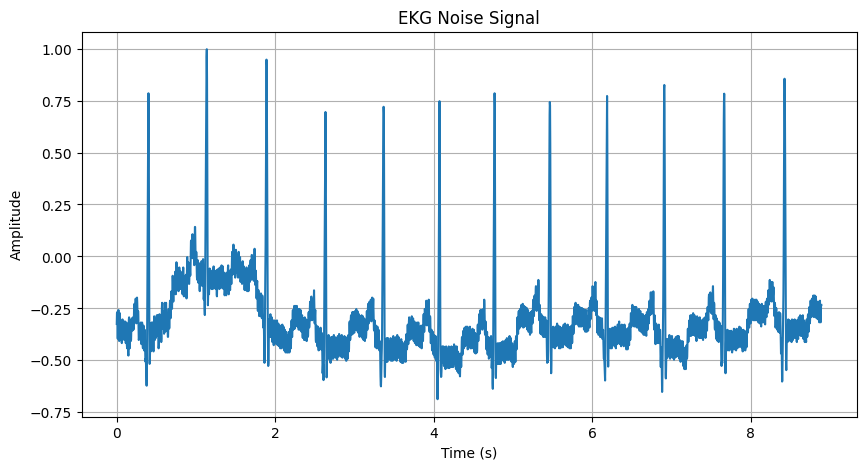

In [6]:

import matplotlib.pyplot as plt

time = ekg_noise[:, 0]
signal = ekg_noise[:, 1]

plt.figure(figsize=(10, 5))
plt.plot(time, signal)
plt.title('EKG Noise Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

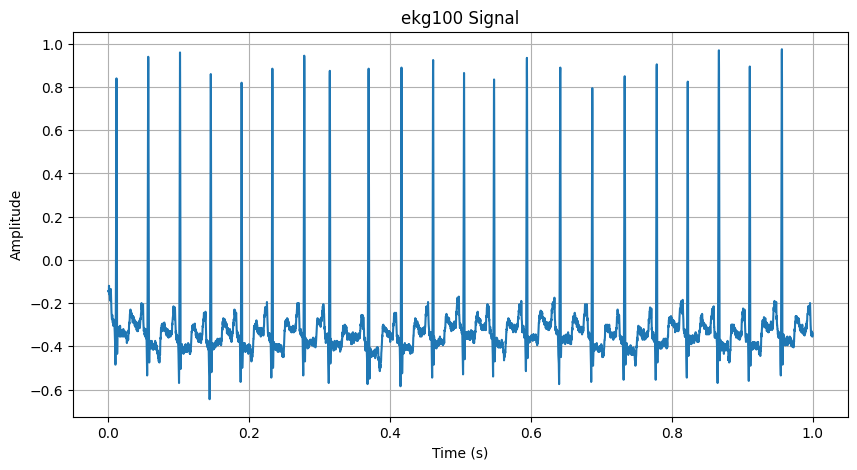

In [7]:
# Extract time and signal values
signal = ekg100[:len(ekg100) // 100]
time = np.linspace(0, 1, len(signal))

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(time, signal)
plt.title('ekg100 Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

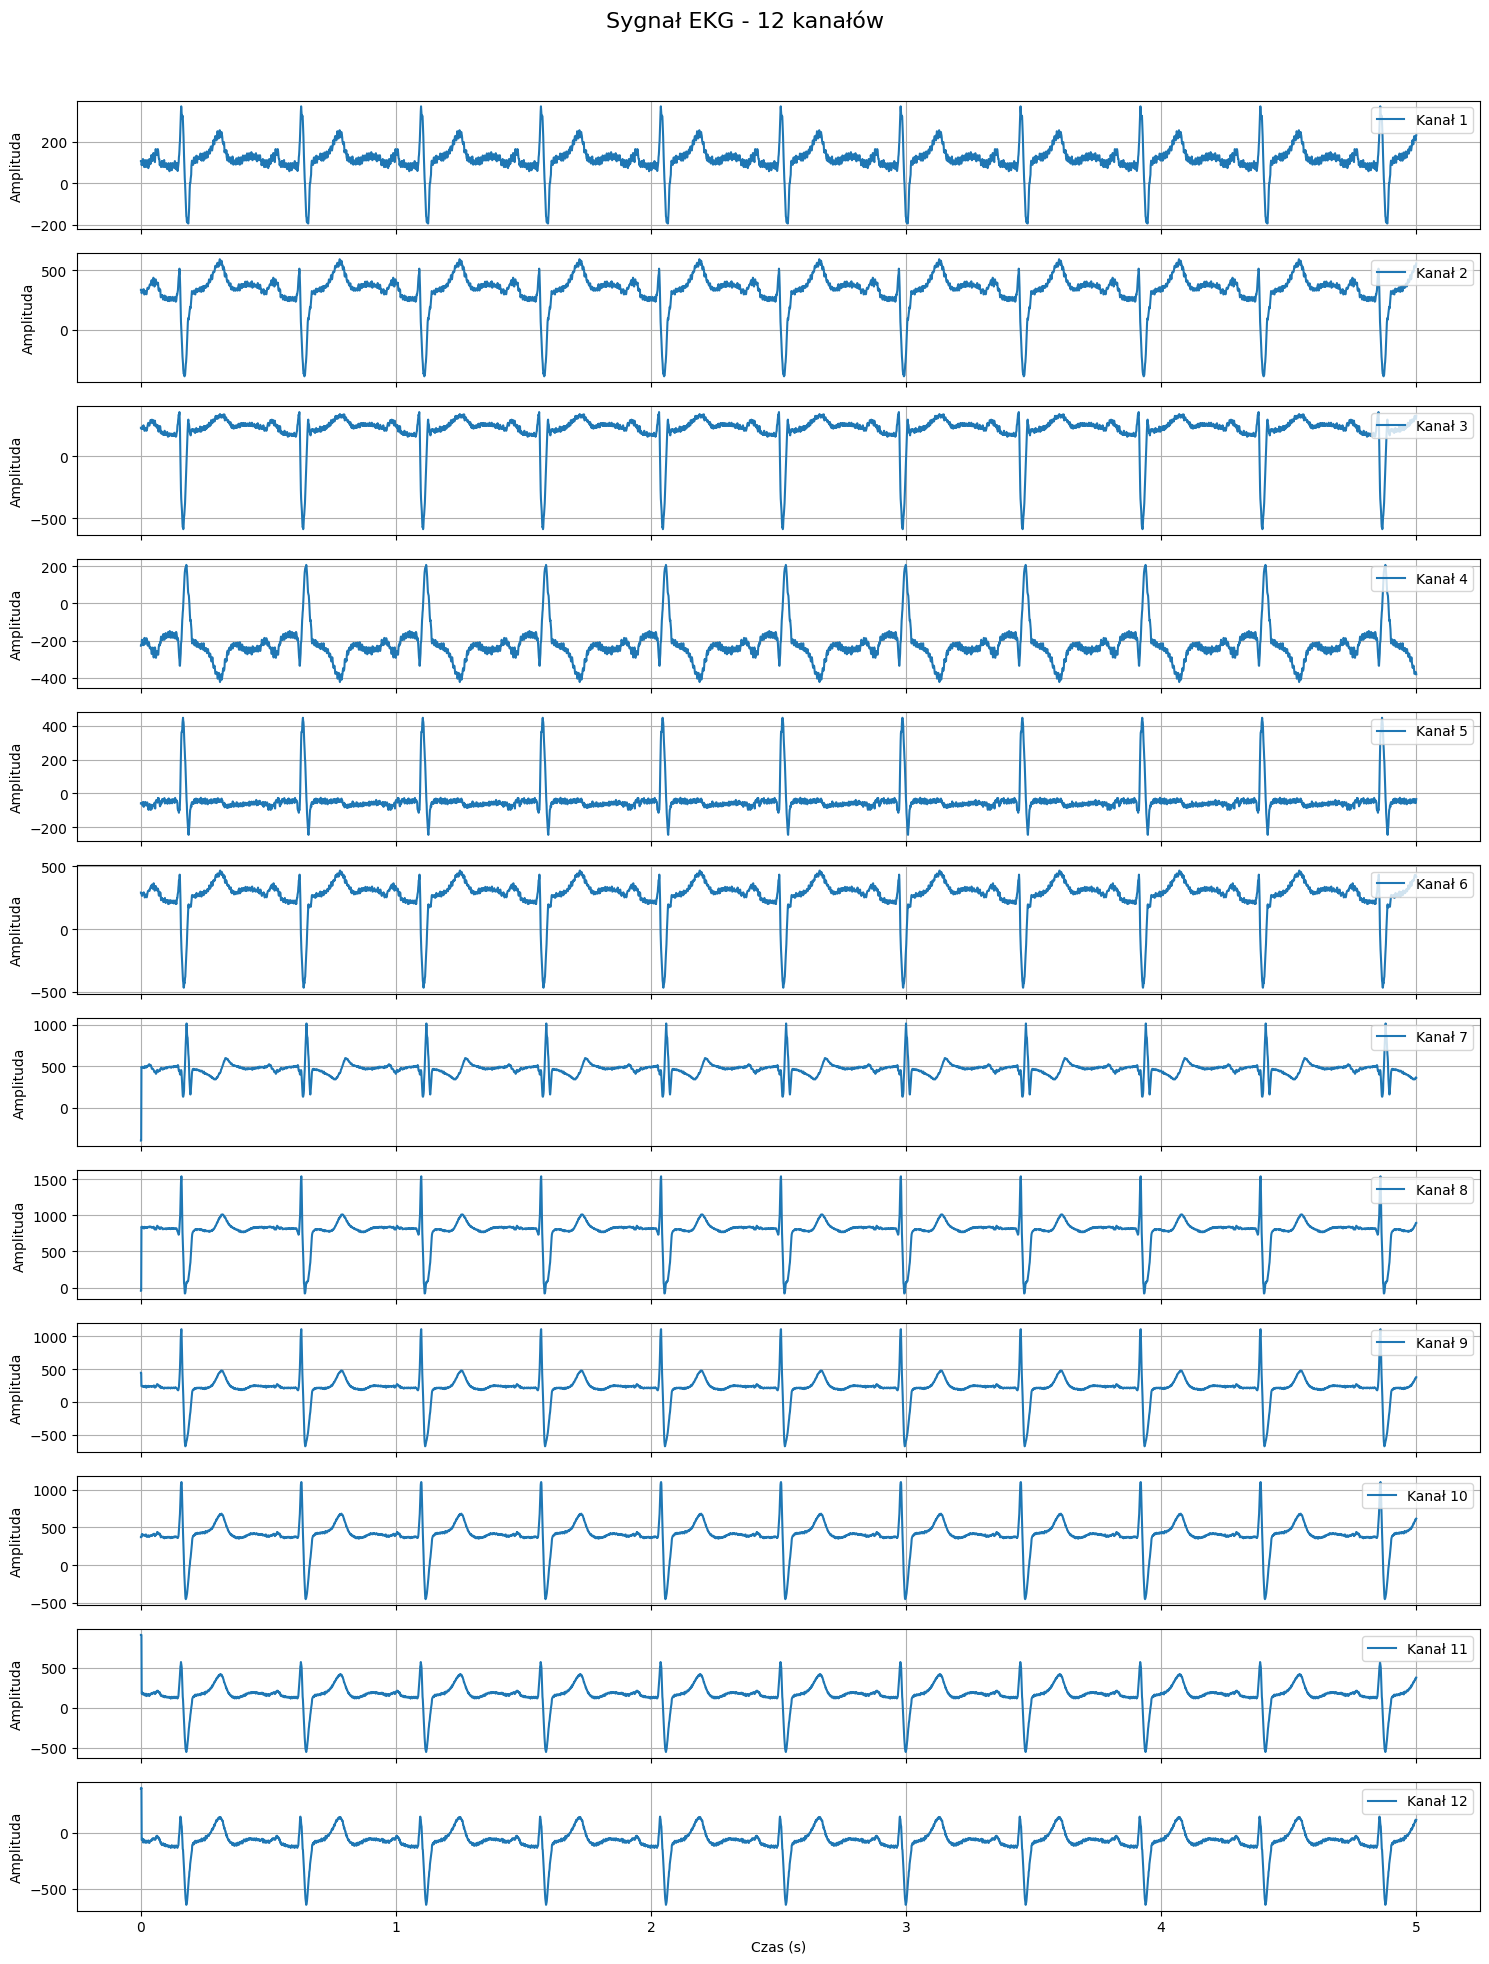

In [8]:
# Tworzenie osi czasu (zakładamy częstotliwość próbkowania 1000 Hz)
signal = ekg1[:len(ekg1) // 1000]
time_ekg1 = np.linspace(0, ekg1.shape[0] / 1000, ekg1.shape[0])

# Tworzenie podwykresów
fig, axes = plt.subplots(12, 1, figsize=(15, 20), sharex=True)
fig.suptitle("Sygnał EKG - 12 kanałów", fontsize=16)

# Iteracja przez kanały i rysowanie każdego na osobnym podwykresie
for i in range(12):
    axes[i].plot(time_ekg1, ekg1[:, i], label=f'Kanał {i + 1}')
    axes[i].set_ylabel("Amplituda")
    axes[i].legend(loc="upper right")
    axes[i].grid(True)

# Ustawienie wspólnej osi X
axes[-1].set_xlabel("Czas (s)")

# Wyświetlenie wykresu
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
